## <span style="color:#2F749F;"><strong>📦 Sesión práctica 2: Análisis Univariado, bivariado y multivariado</strong></span>
---
<p align="right">
  <a href="https://colab.research.google.com/#create=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [ ]:
nombre = input("📝 Ingresa tu nombre completo: ")
correo = input("📧 Ingresa tu correo electrónico: ")
cedula = input("🔢 Ingresa los últimos 6 dígitos de tu cédula: ")

📝 Ingresa tu nombre completo: Luisa Jimenez
📧 Ingresa tu correo electrónico: luisa.jimenez1@udea.edu.co
🔢 Ingresa los últimos 6 dígitos de tu cédula: 225458


## <span style="color:black;"><strong>Parte 1: Análisis Univariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 1: Cálculo de medidas de tendencia central</strong></span>


El caso que se va a analizar es a cerca de las anomalías reportadas en una planta de producción, ya que han aumentado en los últimos meses.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
np.random.seed(225458)


In [ ]:
import numpy as np

# Fijar la semilla
np.random.seed(225458)

# Parámetros
base = 225458
media = (base % 10) + 4   # = 12
desviacion = 6
tamano_muestra = 100

# Generar la muestra y reemplazar valores negativos por 0
residuos = np.random.normal(loc=media, scale=desviacion, size=tamano_muestra).round(0)
residuos = np.where(residuos < 0, 0, residuos)



# Mostrar los resultados
residuos


array([ 8., 13.,  5., 19., 10., 18., 15., 10.,  3., 17.,  8.,  7., 17.,
       14., 11., 14., 10.,  7., 19., 20.,  9.,  8., 19., 12., 13., 11.,
        6., 18., 19., 14., 25.,  7.,  6., 13., 23., 12.,  9.,  6., 17.,
        6., 15., 26.,  2.,  5., 22., 14., 14.,  6., 17., 11., 16.,  6.,
        5., 15.,  8., 10.,  3., 10.,  6., 13.,  6.,  9., 16., 16.,  6.,
        4., 16., 11., 11., 11.,  2.,  7., 18., 27.,  8., 15.,  4., 16.,
        0.,  5.,  9., 10.,  1., 12.,  0., 18., 13.,  4.,  9., 11., 18.,
        3.,  4., 13., 17., 16.,  9.,  4., 14., 21.])

In [ ]:
moda = stats.mode(residuos, keepdims=True)
moda

ModeResult(mode=array([6.]), count=array([9]))

In [ ]:
# Calcular estadísticos
media = np.mean(residuos)
mediana = np.median(residuos)
moda = stats.mode(residuos, keepdims=True)

# Mostrar resultados
print("Media:", round(media, 4))
print("Mediana:", round(mediana, 4))
print("Moda:", moda.mode[0], " (frecuencia:", moda.count[0], ")")

Media: 11.36
Mediana: 11.0
Moda: 6.0  (frecuencia: 9 )


Medidas de tendencia central:
Media:   11.36 residuos
Mediana: 11.00 residuos
Moda:    6.00 residuos


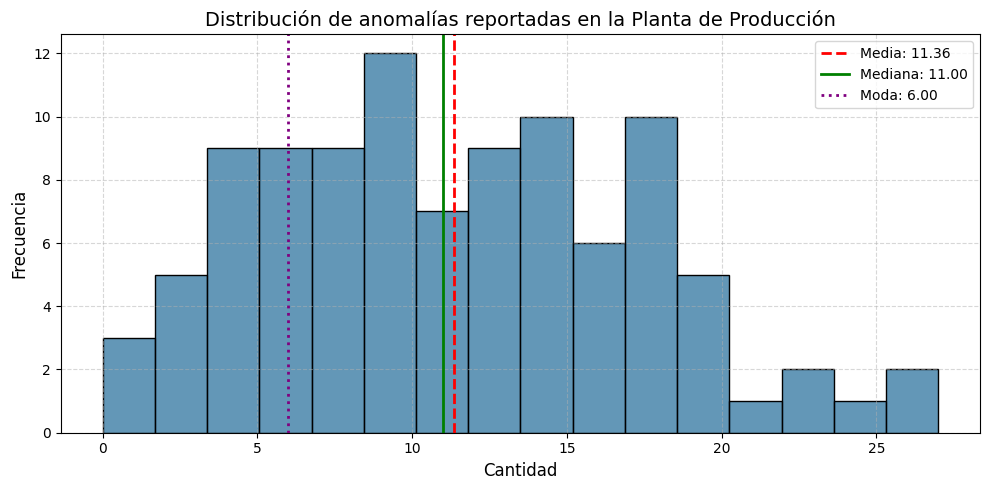

In [ ]:
# Mostrar resultados
print("Medidas de tendencia central:")
print(f"Media:   {media:.2f} residuos")
print(f"Mediana: {mediana:.2f} residuos")
print(f"Moda:    {moda.mode[0]:.2f} residuos")

# Visualización
plt.figure(figsize=(10, 5))
sns.histplot(residuos, bins=16, kde=False, color="#2F749F")


# Líneas de tendencia central
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axvline(moda.mode[0], color='purple', linestyle=':', linewidth=2,
            label=f'Moda: {moda.mode[0]:.2f}')

# Estética
plt.title("Distribución de anomalías reportadas en la Planta de Producción", fontsize=14)
plt.xlabel("Cantidad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

***Análisis.***

En el último més la cantidad de anomalías reportadas diariamente en la planta de producción en su gran mayoría fueron 6, en promedio se reportaron 11.36 anomalías y el valor central de las anomalías es de 11, es decir, que el 50% de las anomalías toman el valor por debajos de 11 y el otro 50% con valores superiores de 11.


### <span style="color:#2F749F;"><strong>Ejercicio 2: Cálculo de medidas de dispersión</strong></span>


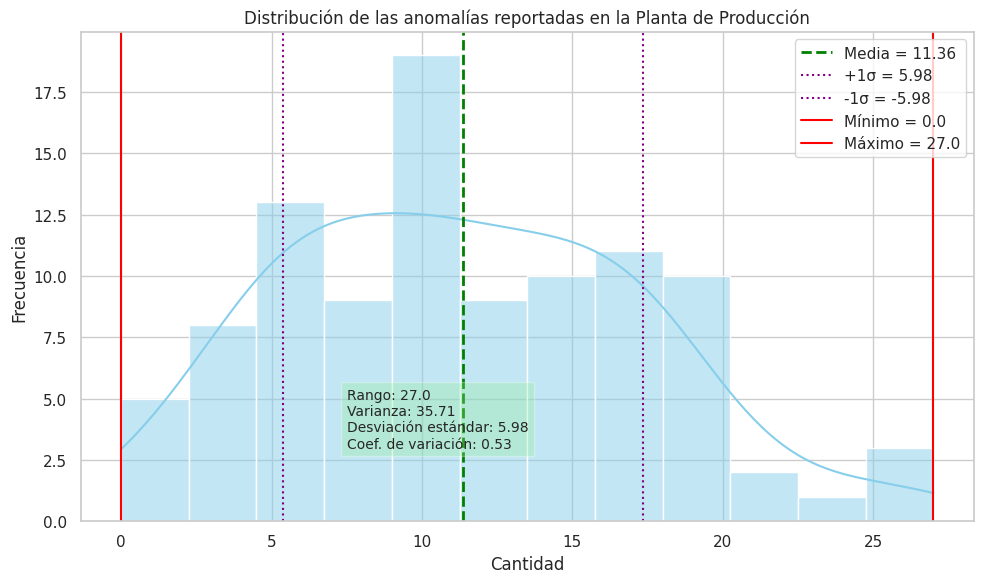

In [ ]:
# Cálculo de medidas de dispersión
media = np.mean(residuos)
minimo = np.min(residuos)
maximo = np.max(residuos)
rango = maximo - minimo
varianza = np.var(residuos, ddof=1)
desviacion = np.std(residuos, ddof=1)
coef_var = desviacion / media

# Visualización
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(residuos, bins=12, kde=True, color='skyblue')

# Líneas verticales
plt.axvline(media, color='green', linestyle='--', linewidth=2, label=f'Media = {media:.2f}')
plt.axvline(media + desviacion, color='purple', linestyle=':', linewidth=1.5, label=f'+1σ = {+ desviacion:.2f}')
plt.axvline(media - desviacion, color='purple', linestyle=':', linewidth=1.5, label=f'-1σ = {- desviacion:.2f}')
plt.axvline(minimo, color='red', linestyle='-', linewidth=1.5, label=f'Mínimo = {minimo}')
plt.axvline(maximo, color='red', linestyle='-', linewidth=1.5, label=f'Máximo = {maximo}')

# Título y etiquetas
plt.title("Distribución de las anomalías reportadas en la Planta de Producción")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.legend()

# Recuadro con medidas
texto = (
    f"Rango: {rango}\n"
    f"Varianza: {varianza:.2f}\n"
    f"Desviación estándar: {desviacion:.2f}\n"
    f"Coef. de variación: {coef_var:.2f}"
)
plt.text(7.5, 3, texto, bbox=dict(facecolor='lightgreen', alpha=0.3), fontsize=10)

plt.tight_layout()
plt.show()

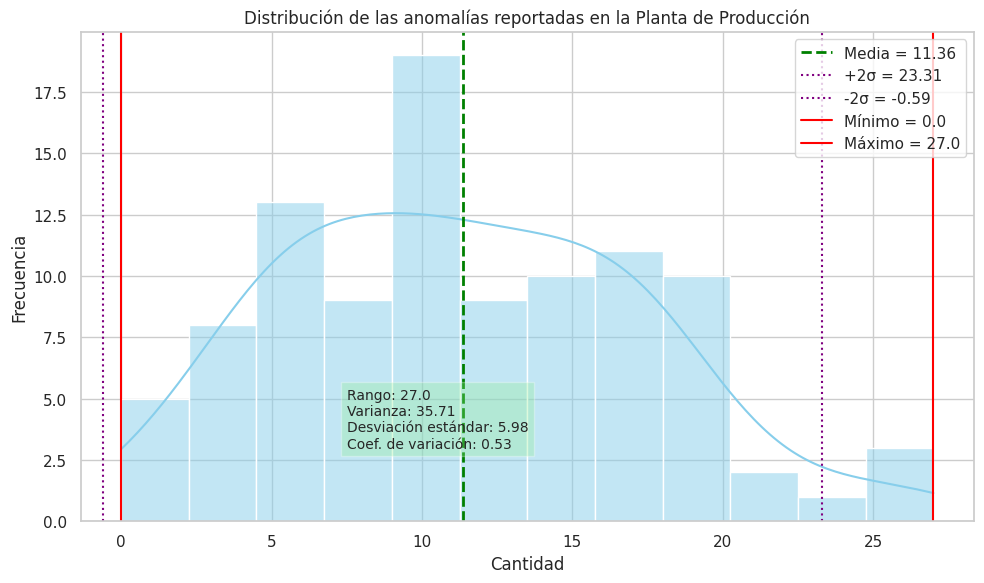

In [ ]:
# Cálculo de medidas de dispersión
media = np.mean(residuos)
minimo = np.min(residuos)
maximo = np.max(residuos)
rango = maximo - minimo
varianza = np.var(residuos, ddof=1)
desviacion = np.std(residuos, ddof=1)
coef_var = desviacion / media

# Visualización
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(residuos, bins=12, kde=True, color='skyblue')

# Líneas verticales
plt.axvline(media, color='green', linestyle='--', linewidth=2, label=f'Media = {media:.2f}')
plt.axvline(media + 2*desviacion, color='purple', linestyle=':', linewidth=1.5,
            label=f'+2σ = {media + 2*desviacion:.2f}')
plt.axvline(media - 2*desviacion, color='purple', linestyle=':', linewidth=1.5,
            label=f'-2σ = {media - 2*desviacion:.2f}')
plt.axvline(minimo, color='red', linestyle='-', linewidth=1.5, label=f'Mínimo = {minimo}')
plt.axvline(maximo, color='red', linestyle='-', linewidth=1.5, label=f'Máximo = {maximo}')

# Título y etiquetas
plt.title("Distribución de las anomalías reportadas en la Planta de Producción")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.legend()

# Recuadro con medidas
texto = (
    f"Rango: {rango}\n"
    f"Varianza: {varianza:.2f}\n"
    f"Desviación estándar: {desviacion:.2f}\n"
    f"Coef. de variación: {coef_var:.2f}"
)
plt.text(7.5, 3, texto, bbox=dict(facecolor='lightgreen', alpha=0.3), fontsize=10)

plt.tight_layout()
plt.show()


***Análisis.***

En los datos observados, el reporte de anomalías, se encuentra dentro de un intervalo de amplitud 27 unidades. Los datos tienen, en promedio, una dispersión cuadrática de 35.71 unidades² alrededor de la media, es decir, que con respecto a la media los datos presentan una alta variabilidad, ya que se distribuyen bastante alejados de la media.

En cuanto a la desviación estándar (1 desviación), nos indica que mas o menos el 68% de la cantidad de anomalías se encuentra entre 5.1 y 16.9 y con (2 desviación) el 95% se encuentra entre −0.8 y 22.8, en este caso el valor sería desde 0, ya que no se pueden reportar anomalías negativas. Lo que indica que la cantidad de anomalías pueden variar desde alrededor de 5 hasta cerca de 17 en la mayoría de los casos, e incluso más en casos extremos.

Y finalmente, el coeficiente de 0.53, nos reafirma la alta variabilidad, dado que aproximadamente el 50% de los datos se encuentra alejado de la media.


### <span style="color:#2F749F;"><strong>Ejercicio 3: Cálculo de medidas de distribución</strong></span>




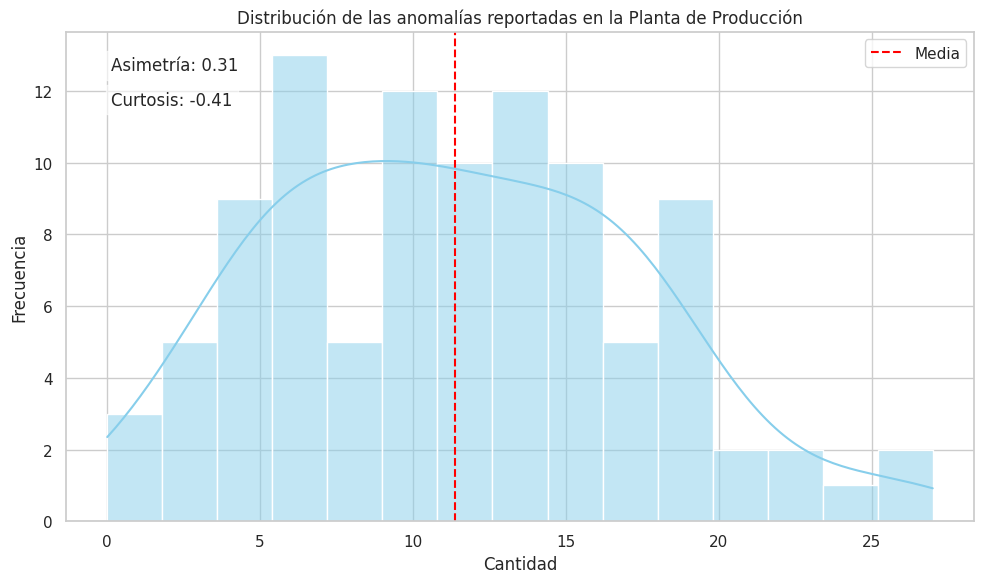

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Estilo visual
sns.set_theme(style="whitegrid")

# Simulación de datos
np.random.seed(225458)
consumo_helados = np.random.normal(loc=media, scale=desviacion, size=tamano_muestra)
df = pd.DataFrame({'Residuos': residuos})

# Cálculo de métricas
asimetria = skew(df['Residuos'])
curtosis_valor = kurtosis(df['Residuos'])

# Visualización
plt.figure(figsize=(10, 6))
sns.histplot(df['Residuos'], kde=True, color='skyblue', bins=15)
plt.axvline(df['Residuos'].mean(), color='red', linestyle='--', label='Media')

# Anotaciones en la esquina superior izquierda
plt.text(0.05, 0.95, f"Asimetría: {asimetria:.2f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))
plt.text(0.05, 0.88, f"Curtosis: {curtosis_valor:.2f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

# Títulos y etiquetas
plt.title('Distribución las anomalías reportadas en la Planta de Producción')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

***Análisis***

Con respecto a las medidas de distribución, indica que la distribución podría tener una cola hacia la derecha, es decir que puede estar sesgada hacia los valores de la izquierda. Y con respecto a la curtosis, se evidencia un posible comportamiento platicurtico.

### <span style="color:#2F749F;"><strong>Ejercicio 4: Cálculo de medidas de percentiles</strong></span>


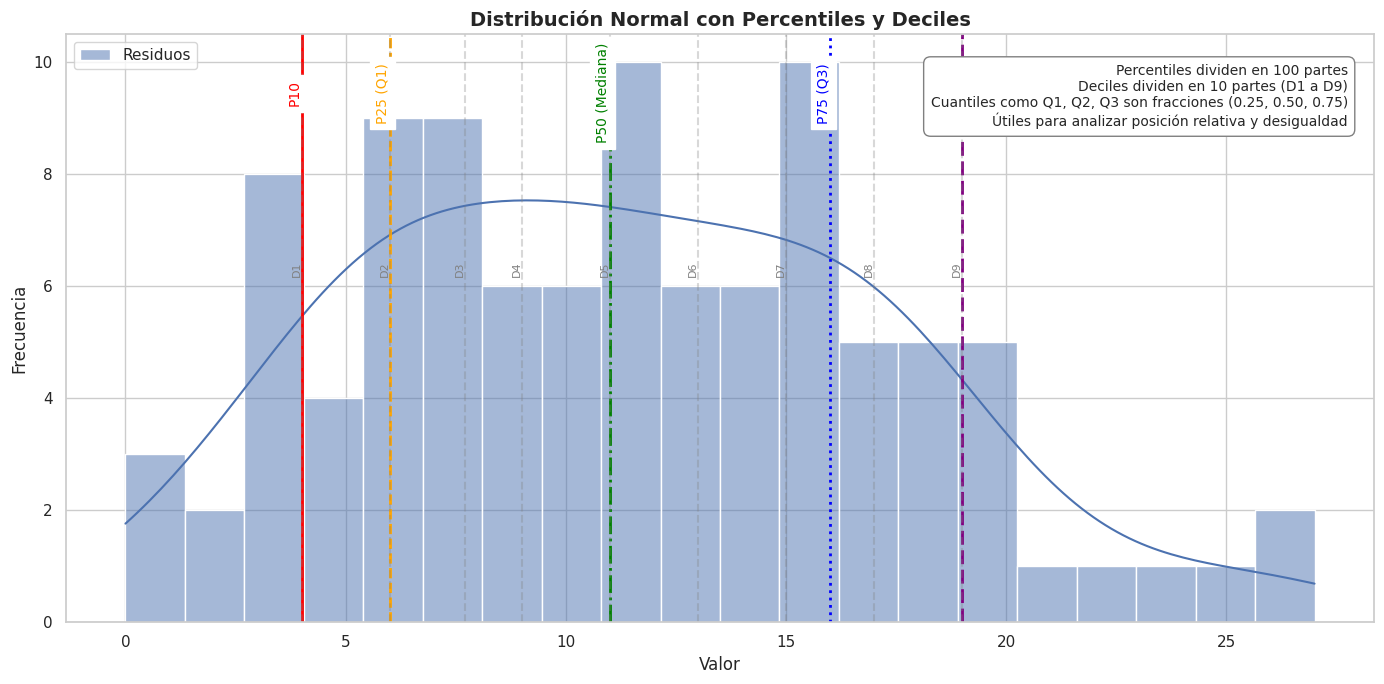

In [ ]:
# Estilo visual
sns.set_theme(style="whitegrid")

# Simulación de datos
np.random.seed(225458)
consumo_helados = np.random.normal(loc=media, scale=desviacion, size=tamano_muestra)
datos = pd.DataFrame({'Residuos': residuos})

# Cálculo de percentiles clave
percentiles = {
    'P10': {'valor': np.percentile(datos, 10), 'color': 'red', 'linestyle': '-'},
    'P25 (Q1)': {'valor': np.percentile(datos, 25), 'color': 'orange', 'linestyle': '--'},
    'P50 (Mediana)': {'valor': np.percentile(datos, 50), 'color': 'green', 'linestyle': '-.'},
    'P75 (Q3)': {'valor': np.percentile(datos, 75), 'color': 'blue', 'linestyle': ':'},
    'P90': {'valor': np.percentile(datos, 90), 'color': 'purple', 'linestyle': (0, (5, 2))}
}

# Cálculo de deciles (D1 a D9)
deciles = {f'D{i}': np.percentile(datos, i * 10) for i in range(1, 10)}

# Visualización
plt.figure(figsize=(14, 7))
sns.histplot(datos, kde=True, color='skyblue', bins=20)

# Líneas verticales para percentiles destacados
for etiqueta, props in percentiles.items():
    plt.axvline(props['valor'], color=props['color'], linestyle=props['linestyle'],
                linewidth=2)
    plt.text(props['valor'], plt.ylim()[1]*0.9, etiqueta,
             rotation=90, color=props['color'], fontsize=10,
             verticalalignment='center', horizontalalignment='right',
             backgroundcolor='white')

# Líneas más sutiles para deciles
for etiqueta, valor in deciles.items():
    plt.axvline(valor, color='gray', linestyle='--', alpha=0.3)
    plt.text(valor, plt.ylim()[1]*0.6, etiqueta,
             rotation=90, color='gray', fontsize=8,
             verticalalignment='center', horizontalalignment='right')

# Recuadro interpretativo
texto = (
    "Percentiles dividen en 100 partes\n"
    "Deciles dividen en 10 partes (D1 a D9)\n"
    "Cuantiles como Q1, Q2, Q3 son fracciones (0.25, 0.50, 0.75)\n"
)
plt.text(0.98, 0.95, texto, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="gray"))

# Títulos y estilo
plt.title("Distribución Normal con Percentiles y Deciles", fontsize=14, fontweight='bold')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

***Análisis***

De acuerdo a la visualización, se evidencia que la mayoría de los datos se encuentran ubicados en los Q2 y Q3, ya que sus tamaños son mas grandes con respecto a Q1 y Q4

## <span style="color:black;"><strong>Parte 2: Análisis Bivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 5: Análisis de correlación</strong></span>

En esta segunda parte, se analiza si las anomalías reportadas en la planta de producción están relacionadas con los cambios en la demanda, según el área de planeación.


In [ ]:
import numpy as np

# Fijar la semilla
np.random.seed(225458)

# Parámetros
base = 225458
media1 = (base % 10) + 4
media2 = (base % 10) + 20
desviacion = 6
tamano_muestra = 100

# Generar la muestra 1 para anomalias y reemplazar valores negativos por 0
anomalias = np.random.normal(loc=media1, scale=desviacion, size=tamano_muestra).round(0)
anomalias = np.where(anomalias < 0, 0, anomalias)

# Generar la muestra 2 para demanda y reemplazar valores negativos por 0
demanda = np.random.normal(loc=media2, scale=desviacion, size=tamano_muestra).round(0)
demanda = np.where(demanda < 0, 0, demanda)


***Coeficiente de Pearson***

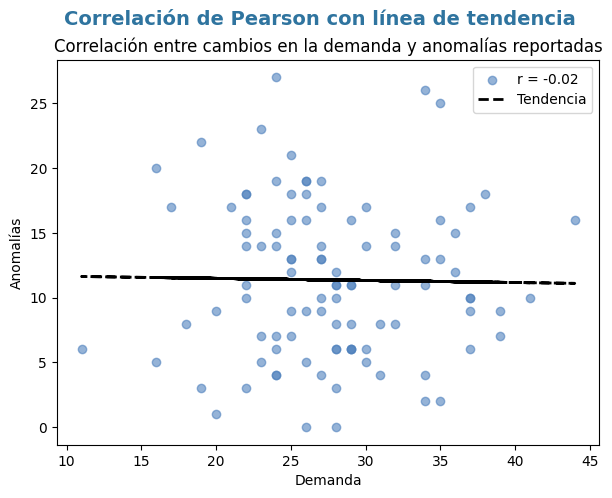

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Correlación
x1 = demanda
y1 = anomalias
r1, _ = pearsonr(x1, y1)

# Visualización
fig, ax = plt.subplots(figsize=(7, 5))

def plot_corr(ax, x, y, r, title, color):
    ax.scatter(x, y, alpha=0.6, color=color, label=f"r = {r:.2f}")

    # Línea de tendencia
    m, b = np.polyfit(x, y, 1)  # ajuste lineal (pendiente y corte)
    ax.plot(x, m*x + b, color="black", linewidth=2, linestyle="--", label="Tendencia")

    ax.set_title(title)
    ax.set_xlabel("Demanda")
    ax.set_ylabel("Anomalías")
    ax.legend()

# Grafica
plot_corr(ax, x1, y1, r1, "Correlación entre cambios en la demanda y anomalías reportadas", "#4F81BD")

plt.suptitle("Correlación de Pearson con línea de tendencia", fontsize=14, color="#2F749F", fontweight="bold")
plt.show()


***Coeficiente Spearman***

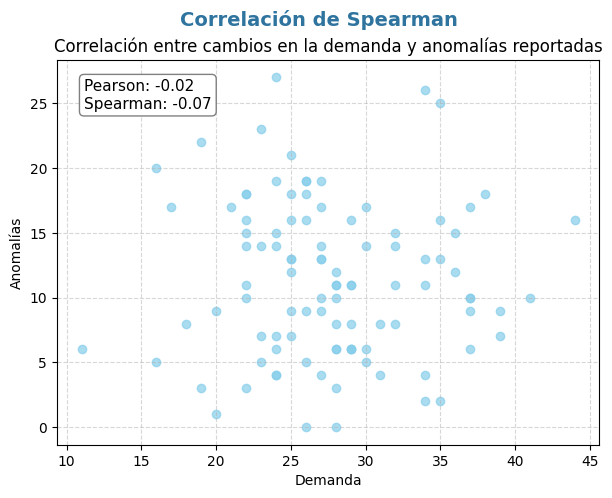

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x1 = demanda
y1 = anomalias

# Correlaciones
def calcular_correlaciones(x, y):
    pearson, _ = stats.pearsonr(x, y)
    spearman, _ = stats.spearmanr(x, y)
    return pearson, spearman

p1, s1 = calcular_correlaciones(x1, y1)

# Visualización
plt.figure(figsize=(7, 5))

# Título superior (general)
plt.suptitle("Correlación de Spearman", fontsize=14, color="#2F749F", fontweight="bold")

# Título secundario (más específico)
plt.title("Correlación entre cambios en la demanda y anomalías reportadas", fontsize=12)

# Gráfico
plt.scatter(x1, y1, color="skyblue", alpha=0.7)
plt.xlabel("Demanda")
plt.ylabel("Anomalías")

# Texto con resultados
texto1 = f"Pearson: {p1:.2f}\nSpearman: {s1:.2f}"
plt.text(0.05, 0.95, texto1, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


***Análisis***

De acuerdo a la gráfica de Pearson, se podría afirmar que no hay correlación entre el reporte de anomalías y los cambios (aumento o disminución) de la demanda en la planta de producción, ya que el comportamiento es aleatorio y no existe tendencia positiva o negativa.

Por parte de la gráfica de Spearman, indica que tal vez no hay correspondencia entre el reporte de anomalías y los cambios (aumento o disminución) de la demanda en la planta de producción, en vista de , adicionalmente, el valor de -0.07 muy cercano a 0, podría ser indicio de ausencia de correlación monótona.

De esta manera, se podría decir que las variables "Demanda" y "Anomalias" con base en el análisis de correlación no evidencian relación entre ellas.

### <span style="color:#2F749F;"><strong>Ejercicio 6: Chi-Cuadrado</strong></span>

En esta parte, analiza si existe **asociación estadística** entre dos variables categóricas, el acceso a internet y nivel de estudio en una población de 60 personas.


In [ ]:
import numpy as np
import pandas as pd

# Fijar la semilla
np.random.seed(225458)

# Tamaño de muestra
tamano_muestra = 60

# Variables categóricas
niveles_educativos = ["Básico", "Medio", "Superior"]
internet = ["Sí", "No"]

nivel_educativo = np.random.choice(niveles_educativos, size=tamano_muestra, p=[0.3, 0.4, 0.3])
acceso_internet = np.random.choice(internet, size=tamano_muestra, p=[0.7, 0.3])

# --------------------------
# Crear DataFrame
# --------------------------
df = pd.DataFrame({
    "Nivel educativo": nivel_educativo,
    "Acceso a internet": acceso_internet
})

# --------------------------
# Tabla de contingencia
# --------------------------
tabla_indep = pd.crosstab(df["Nivel educativo"], df["Acceso a internet"])

print(tabla_indep)

Acceso a internet  No  Sí
Nivel educativo          
Básico              4  17
Medio               6  18
Superior            1  14


Chi2 = 2.083, p-valor = 0.353
Grados de libertad: 2
Frecuencias esperadas:
 Acceso a internet    No     Sí
Nivel educativo               
Básico             3.85  17.15
Medio              4.40  19.60
Superior           2.75  12.25 



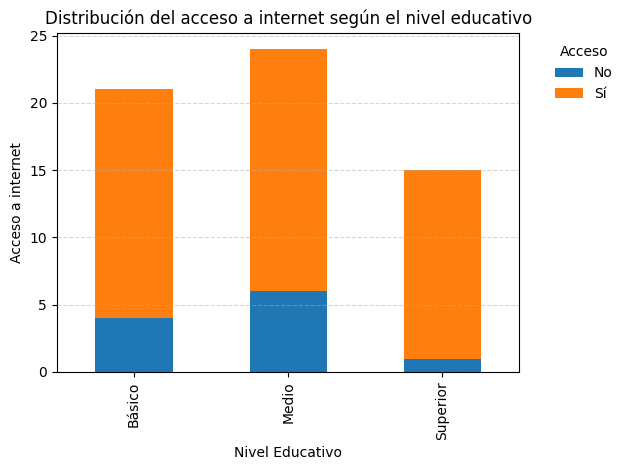

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# --------------------------
# Grafica de Chi2
# --------------------------

chi2, p, dof, expected = chi2_contingency(tabla_indep)
print(f"Chi2 = {chi2:.3f}, p-valor = {p:.3f}")
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", pd.DataFrame(expected, index=tabla_indep.index, columns=tabla_indep.columns), "\n")

ax = tabla_indep.plot(kind="bar", stacked=True)
ax.set_title("Distribución del acceso a internet según el nivel educativo")
ax.set_ylabel("Acceso a internet")
ax.set_xlabel("Nivel Educativo")
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(title="Acceso", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False)
plt.tight_layout()
plt.show()


***Análisis***

Con los valores de Chi2 = 2.083 y el p-valor = 0.353, se evidencia que el Chi2 es un valor pequeño y el p-valor es mayor a 0.05, se podría inferir que no hay evidencia suficiente para afirmar que las variables están relacionadas. Adicionalemente, la gráfica muestra que aunque en el Nivel Educativo Superior si es diferente la distribuciòn entre acceso a internet y el no acceso, en los niveles Básico y Medio de educación, la distribución es casi igual, no se evidencia diferencia.